# Lab 3: Clustering and Manifold Learning

### A. Import of Python Modules and Dataset

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing # needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA 

#### Load the dataset

In [2]:
df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### B. Rescale the Data

I will rescale the values in each column to the interval $[0,1]$ with MinMaxScaler.

In [3]:
dataprescaler= data

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

I will rescale the values with the StandardScaler.

In [5]:
X = StandardScaler().fit_transform(data)
X

array([[-0.73780632,  0.40757955, -0.05342334, ...,  1.42814704,
         0.67451931, -0.05050043],
       [ 0.25346957,  0.02255809, -0.08539434, ..., -0.70020801,
        -1.48253724,  0.02110079],
       [-0.73780632, -0.56483834, -1.30086785, ...,  1.42814704,
         0.67451931, -1.11637665],
       ...,
       [ 0.25346957,  0.96384015,  1.44736764, ...,  1.42814704,
         0.67451931,  0.59241822],
       [ 1.24474546,  0.85194757,  0.7370083 , ...,  1.42814704,
         0.67451931,  0.41983269],
       [-0.73780632,  0.02255809, -0.00610631, ..., -0.70020801,
        -1.48253724, -0.46563876]])

### C. Scatterplot Function (to be used below for visualising a clustering

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [7]:
k = 3

#### Run k-Means

In [8]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

Append the cluster centers to the dataset.

In [9]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [10]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

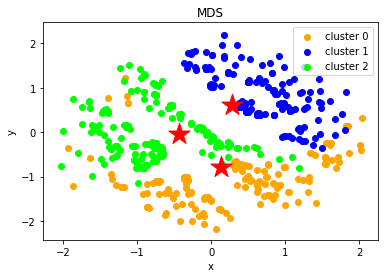

In [11]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [12]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

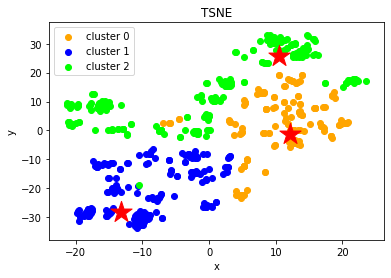

In [13]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

I will use the elbow method to choose the best value for k.

#### Calculate k using Elbow method

In [14]:
# Without Scaling
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(dataprescaler)
    wcss.append(kmeanModel.inertia_)

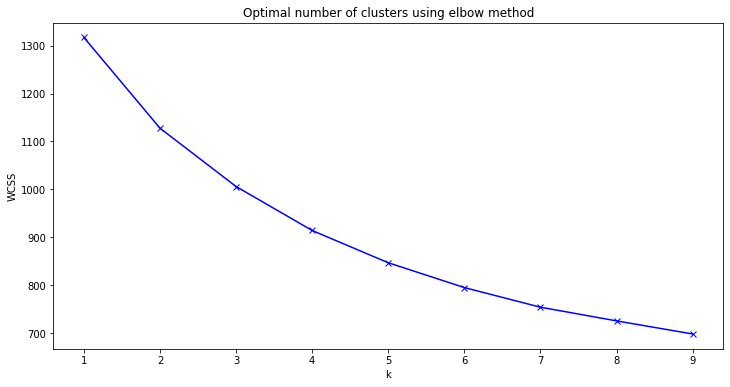

In [15]:
plt.figure(figsize=(12,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal number of clusters using elbow method')
plt.show()

After 6 or 7 the drop in WCSS seems to be minimal. I will choose eiher 6 or 7 as the optimal number of clusters.

In [16]:
# Data After Scaling
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(data)
    wcss.append(kmeanModel.inertia_)

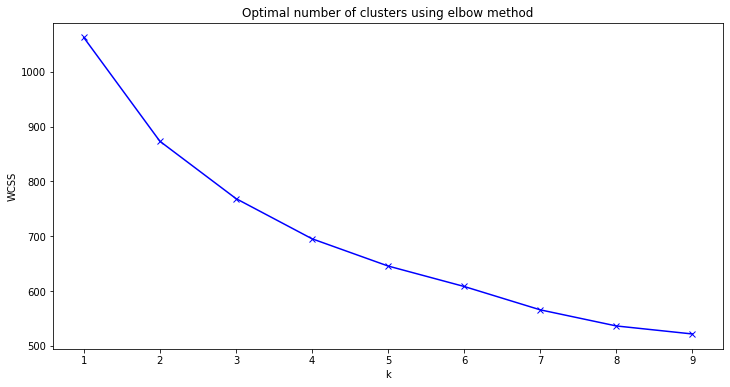

In [17]:
plt.figure(figsize=(12,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal number of clusters using elbow method')
plt.show()

After 6 or 7 the drop in WCSS seems to be minimal. I will choose either 6 or 7 as the optimal number of clusters.

In [18]:
# Data with StandardScaler
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

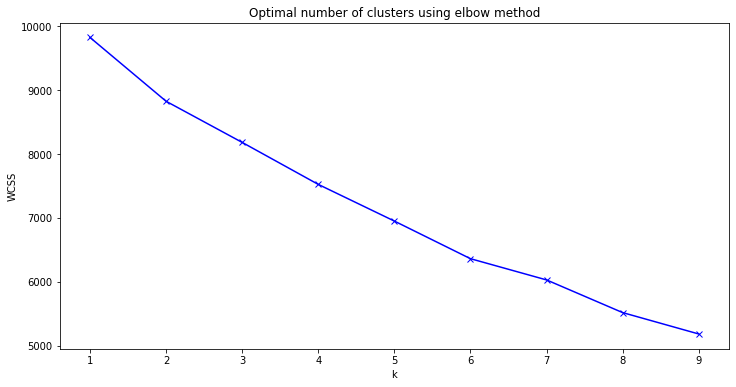

In [19]:
plt.figure(figsize=(12,6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal number of clusters using elbow method')
plt.show()

After 7 or 8 the drop in WCSS seems to be minimal. I will choose either 7 or 8 as the optimal number of clusters.

#### Calculate k using Silhouette method

I will use the silhouette method to choose the best value for k.

In [20]:
for n_cluster in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.18654028464861305
For n_clusters=3, The Silhouette Coefficient is 0.1915495261821749
For n_clusters=4, The Silhouette Coefficient is 0.19497456616334385
For n_clusters=5, The Silhouette Coefficient is 0.20511544267477957
For n_clusters=6, The Silhouette Coefficient is 0.20342286785878547
For n_clusters=7, The Silhouette Coefficient is 0.2217941545626608
For n_clusters=8, The Silhouette Coefficient is 0.2299655341537876
For n_clusters=9, The Silhouette Coefficient is 0.2227916500282515
For n_clusters=10, The Silhouette Coefficient is 0.22783207558156798


**Interpretation of the Silhouette Coefficient**
<br>
- There are no negative values. Therefore, I assume that samples have been assigned to the right clusters.
- The values are also not close to + 1. Therefore, I assume that the same is not far away from the neighbouring cluster.
- The values are close to 0. Therefore, I assume that the sample is close to the decision boundary.

In [21]:
for n_cluster in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.13926687924566777
For n_clusters=3, The Silhouette Coefficient is 0.143987693461541
For n_clusters=4, The Silhouette Coefficient is 0.16082817533025112
For n_clusters=5, The Silhouette Coefficient is 0.12436137718805222
For n_clusters=6, The Silhouette Coefficient is 0.12725193511875643
For n_clusters=7, The Silhouette Coefficient is 0.1343935552679558
For n_clusters=8, The Silhouette Coefficient is 0.15689490991704544
For n_clusters=9, The Silhouette Coefficient is 0.13147525224968473
For n_clusters=10, The Silhouette Coefficient is 0.15436711565001462


**Interpretation of the Silhouette Coefficient**
<br>
- There are no negative values. Therefore, I assume that samples have been assigned to the right clusters.
- The values are also not close to + 1. Therefore, I assume that the same is not far away from the neighbouring cluster.
- The values are close to 0. With th StandardScaler, the data is even closer to zero for all clusters. Therefore, I assume that the sample is very close to the decision boundary.

For n_clusters = 2 The average silhouette_score is : 0.18654028464861305
For n_clusters = 3 The average silhouette_score is : 0.1915495261821749
For n_clusters = 4 The average silhouette_score is : 0.19355792755791362
For n_clusters = 5 The average silhouette_score is : 0.2053295115531095
For n_clusters = 6 The average silhouette_score is : 0.20338840682375517
For n_clusters = 7 The average silhouette_score is : 0.20229468175850557
For n_clusters = 8 The average silhouette_score is : 0.21834408598517094
For n_clusters = 9 The average silhouette_score is : 0.2277664020445499


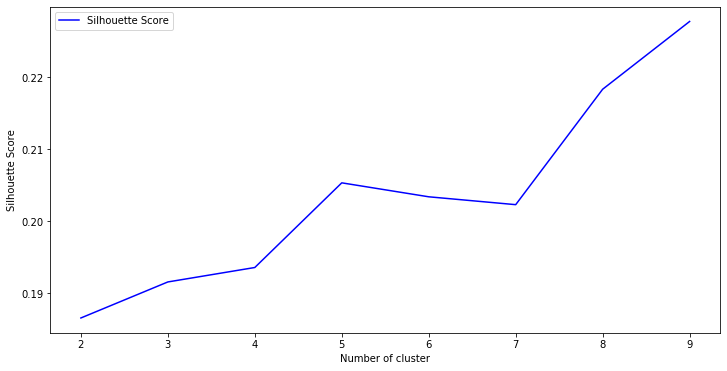

In [22]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
ss = []
for num in range_n_clusters:
    #iterating through cluster sizes
    clusters = KMeans(n_clusters = num, random_state=0).fit(data)
    cluster_labels = clusters.fit_predict(data)
    #Finding the average silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", num,"The average silhouette_score is :", silhouette_avg)
    
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [23]:
# based on the Elbow Method for determining the number of clusters k.  
# The optimium k = 7 as this is where there is a bend in the elbow of the curve.
k = 7

In [24]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

In [25]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

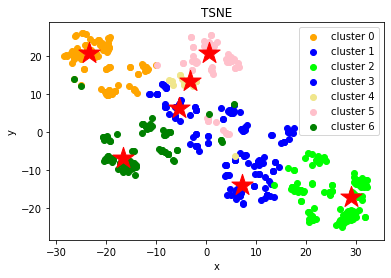

In [26]:
k = 7
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

#### E2. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

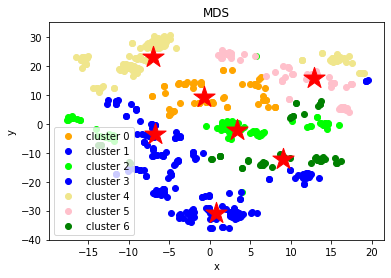

In [27]:
k = 7
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E3. Agglomerative Clustering

I will agglomerative (hierarchical) clustering to the same data set.

In [28]:
from sklearn.preprocessing import StandardScaler, normalize 
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(data) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [29]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

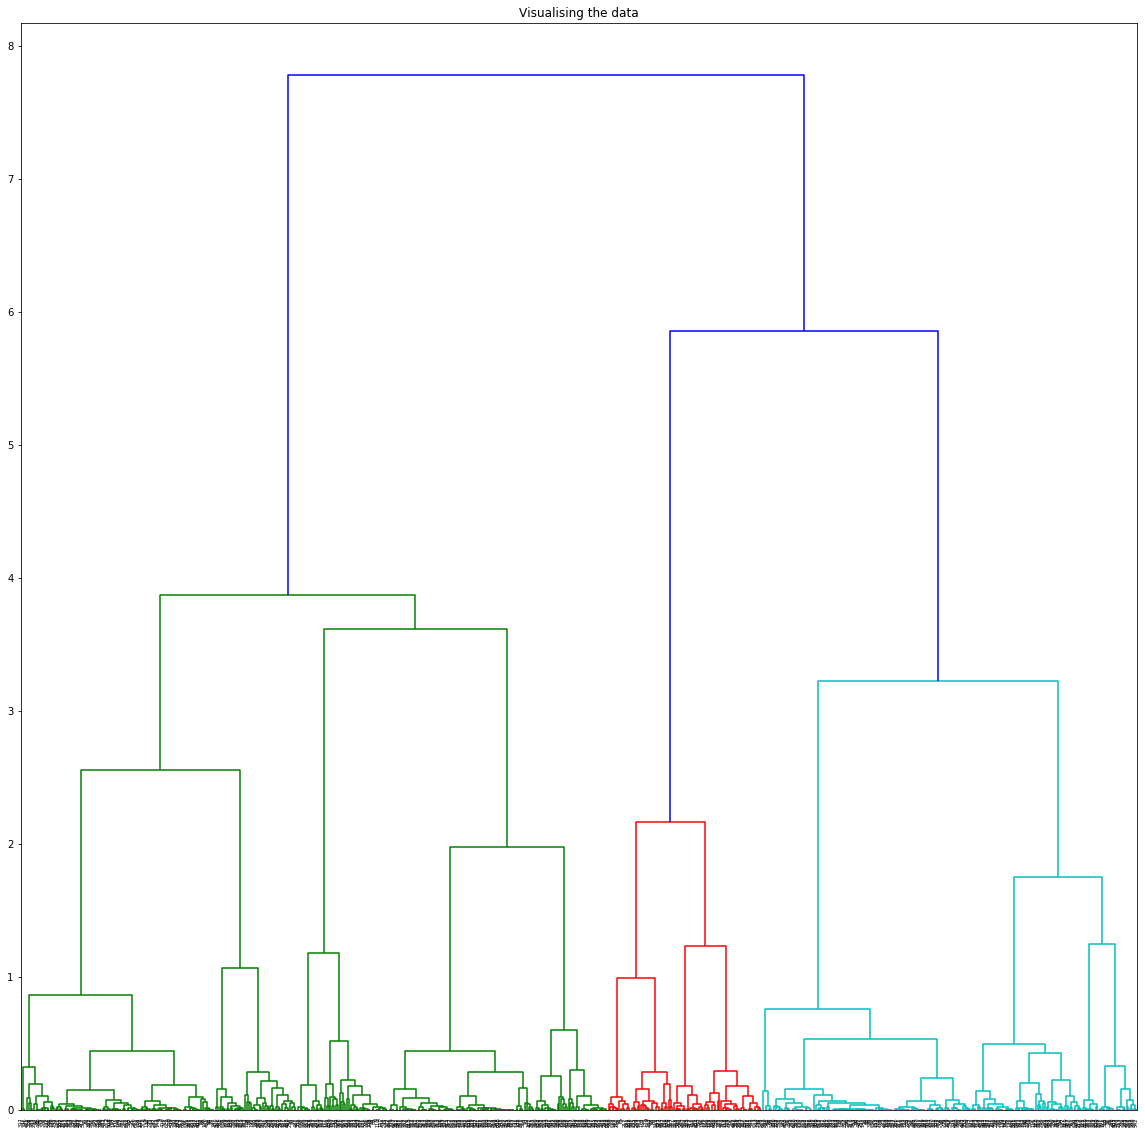

In [30]:
plt.figure(figsize =(20, 20)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

The y-axis is a measure of closeness of either individual data points or clusters. The higher the position the later the object links with others, and hence more like it is an outlier or a stray one. Some data points join very late. It means that they are more far away.

K = 2

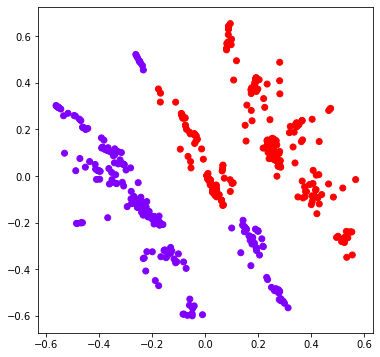

In [31]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

K = 3

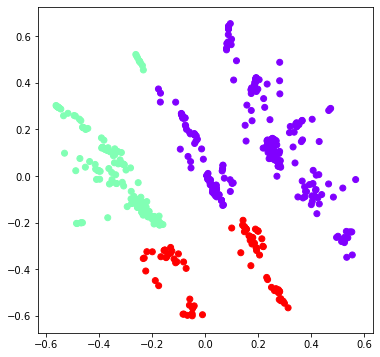

In [32]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

k = 4

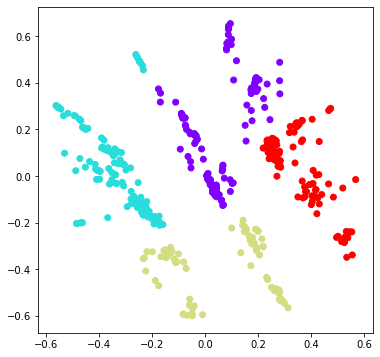

In [33]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

K = 5

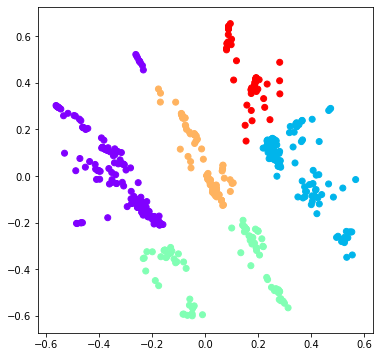

In [34]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

K = 6

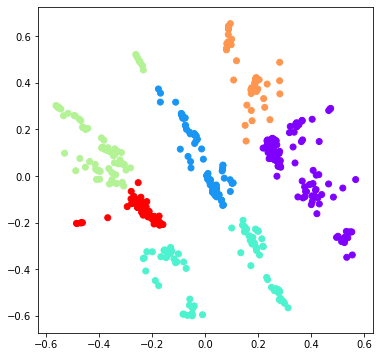

In [35]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

K = 7

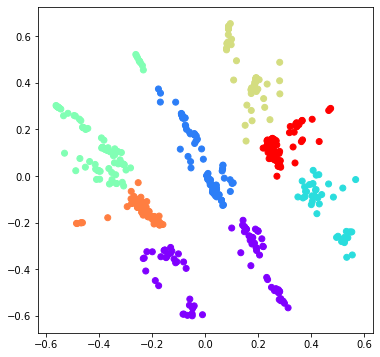

In [36]:
ac7 = AgglomerativeClustering(n_clusters = 7) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac7.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

I will now determine the optimal number of clusters using the silhouette scores.

#### Evaluating different numbers of K and visualising the result

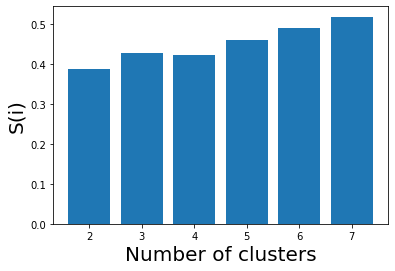

In [37]:
k = [2, 3, 4, 5, 6, 7] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac7.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

With the help of silhouette scores, the optimal number of clusters for the given data and for the agglomerative clustering is 7.

### F. Cluster Analysis

In [38]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [39]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,3
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,2
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,3
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,3


In [40]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,5
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,2
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,5


In [41]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.319249,0.768481,0.965117,0.715845,0.985915,0.929577,0.000000,0.676056,0.000000,0.126761,0.070423,1.000000,0.492958,0.000000,0.760563,0.697852
1,0.300000,0.910167,1.094051,0.712500,0.000000,0.900000,0.042857,0.757143,0.000000,0.157143,0.014286,0.328571,0.285714,0.342857,0.000000,0.875420
2,0.280899,0.990041,1.179514,0.704775,0.977528,0.977528,0.022472,0.786517,0.000000,0.168539,0.056180,0.000000,0.000000,0.000000,0.831461,1.000764
3,0.301235,0.936883,1.086527,0.681111,0.992593,0.970370,0.014815,0.822222,0.007407,0.103704,0.066667,0.177778,0.000000,1.000000,0.859259,0.882314
4,0.241192,0.980553,1.133121,0.729675,0.983740,1.000000,0.000000,0.756098,0.008130,0.130081,0.032520,0.000000,1.000000,0.000000,0.861789,0.940191
5,0.124378,0.892005,1.021487,0.727612,0.895522,0.000000,0.059701,0.268657,0.014925,0.149254,0.059701,0.119403,0.820896,0.000000,0.820896,0.750616
6,0.084746,0.839767,0.952920,0.747881,0.898305,0.322034,0.033898,0.084746,0.000000,0.118644,0.067797,0.135593,0.000000,0.728814,0.288136,0.758425


**Interpretation of the clusters** 
<br> 
- Cluster 0 applicants have credit history and don't have a loan. More than the half live in an urban area. They are male and not married. 
<br> 
- Cluster 1 applicants have high credit history score and they have a loan. They live in an urban area and in semi-urban area. They are married and male. 
<br> 
- Cluster 2 applicants have high credit history score. They have a loan. They live in a semi-urban area. They are not married. More of the half are males.
<br> 
- Cluster 3 applicants have no credit history and they don't have a loan. They live in semi-urban. They are married and male.
<br>
- Cluster 4 applicants have high credit history and have a loan. They are married and male. more than applicants live in urban area. 
<br>
- Cluster 5 applicants have a loan and have high credit score. They are male and not married. More than the half live in urban area.
<br>
- Cluster 6 applicants don't have a credit history score and don't have a loan. They are male and married. Theylive in semi-urban or in urban area.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._